# Unidad 4: Aprendizaje supervisado y semisupervisado

Los problemas son generalistas a propósito (tienen muchas formas de ser resueltos dependiendo de las decisiones que vayas tomando). Son ejemplos perfectos de lo que podría solicitarse el día del examen final (de hecho, los del examen estarán más guiados, incluso). El primer problema está pensado para ser resuelto usando técnicas de aprendizaje supervisado.


## Problema 1: Sistema de arranque Tesla

### Enunciado

> Elon Musk se ha puesto en contacto con nuestra empresa para crear un sistema experto que determine, antes de arrancar el coche, la probabilidad de tener un accidente. Para ello, nos han otorgado acceso a un conjunto de datos pequeño, de 600 mediciones, en las que hubo (o no) accidentes.



1.   Realiza un AED sobre el conjunto de datos.

*   Estadísticos iniciales. 0.2 puntos
*   Distribuciones de las variables numéricas del conjunto de datos. 0.3 puntos
*   Matriz de correlación. 0.5 puntos

2. Realiza el preprocesamiento de datos de tu problema.

*   Reserva un conjunto de datos para validación y otro para testeo. 0.5 puntos
*   Columnas inútiles, valores sin sentido y atípicos. 1 puntos
*   Tratamiento de valores nulos. 0.5 puntos
*   Análisis de variabilidad. 0.5 puntos
*   Columnas categóricas. 0.5 punto
*   Reducción de la dimensionalidad. 1 punto

3.  Entrena y optimiza un modelo de KNN.

*   Entrenar un KNN. 0.4 puntos
*   Optimizar el KNN con la técnica GridSearch. 0.6 puntos

4.  Entrena y optimiza un modelo de DT.
*   Entrenar un DT. 0.3 puntos
*   Explicar el DT. 0.1 puntos
*   Optimizar el DT con la técnica RandomSearch. 0.5 puntos
*   Explicar el DT. 0.1 puntos

5.  Entrena y optimiza un modelo de SVM.
*   Entrenar un SVM. 0.7 puntos
*   Optimizar el SVM con la técnica GridSearch. 0.3 puntos

6.  Entrena y optimiza un modelo de NL.
*   Entrenar un NL. 0.4 puntos
*   Optimizar el NL con la técnica RandomSearch. 0.6 puntos

7.  Crear modelos ensemble usando:
*   Los tres mejores modelos obtenidos, usando el siguiente criterio: media aritmética de todos los modelos que tengan una fiabilidad superior al 80%. 0.7 puntos
*   Todos los modelos, usando como criterio un modelo de Regresión Lineal. 0.3 puntos


## Clonado de repositorio y carga de datos


### Clonado del repo que he creado para simular la carga como en un examen

Quiero clonar el repo para después descomprimir los archivos necesarios,   localizar el CSV real de Tesla y cargarlo en `df_tesla` podría ser sin rutas absolutas, pero lo haré a mano.


In [1]:
# MODO EXAMEN: clonado y carga de datos (sin rutas absolutas)
!test -d PIA_04_datasets || git clone https://github.com/kachytronico/PIA_04_datasets
!find PIA_04_datasets -name "datasets.zip"
!mkdir -p PIA_04_datasets/unzip
!unzip -o PIA_04_datasets/datasets.zip -d PIA_04_datasets/unzip
!find PIA_04_datasets/unzip -name "*.csv"



Cloning into 'PIA_04_datasets'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 32 (delta 8), reused 25 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (32/32), 1.46 MiB | 6.00 MiB/s, done.
Resolving deltas: 100% (8/8), done.
PIA_04_datasets/datasets.zip
Archive:  PIA_04_datasets/datasets.zip
  inflating: PIA_04_datasets/unzip/fallos_producto.csv  
  inflating: PIA_04_datasets/unzip/sistema_de_arranque.csv  
PIA_04_datasets/unzip/fallos_producto.csv
PIA_04_datasets/unzip/sistema_de_arranque.csv


### Carga de datos

Voy a revisar `df_tesla.shape` y un `head()` para validar filas, columnas y formato.

In [2]:
import pandas as pd

# Aquí localizo y cargo solo Tesla
df_tesla = pd.read_csv("PIA_04_datasets/unzip/sistema_de_arranque.csv")# Se añaden comillas a la ruta para que sea un string válido
print("✅ df_tesla:", df_tesla.shape)
df_tesla.head()# Aquí reviso el CSV cargado


✅ df_tesla: (638, 14)


,index,weather,road,time,traffic,speed_limit,vehicles,drunked,severity,road_condition,vehicle,age,light,accident
0,272,Rainy,Rural Road,Evening,0.0,120.0,5.0,Yes,Moderate,Wet,Car,38.0,Artificial Light,0.0
1,645,Rainy,Highway,Afternoon,1.0,120.0,1.0,No,Low,Dry,Car,27.0,Daylight,0.0
2,343,Clear,Highway,Afternoon,0.0,60.0,4.0,No,Low,Wet,Car,25.0,NaN,0.0
3,358,Snowy,Highway,Evening,1.0,30.0,5.0,No,Low,Dry,Car,52.0,Daylight,1.0
4,412,Clear,Highway,Afternoon,NaN,30.0,1.0,No,Low,Wet,Car,25.0,NaN,0.0


### Conclusiones

Cargo `df_tesla` con 638 filas y 14 columnas.
En el head veo variables como `weather`, `road`, `speed_limit`, `vehicles`, `age` y `accident`.
Ejemplo: en la fila 0 aparece `weather` Rainy, `road` Rural Road, `speed_limit` 120.0, `vehicles` 5.0 y `accident` 0.0.
En la fila 2 el campo `light` aparece como NaN, lo que ya anticipa nulos.

## 1. Realiza un AED sobre el conjunto de datos.

Comenzamos analizando la estructura del dataset, sus estadísticas básicas y las relaciones entre variables.

\*   Estadísticos iniciales. 0.2 puntos

\*   Distribuciones de las variables numéricas del conjunto de datos. 0.3 puntos

\*   Matriz de correlación. 0.5 puntos

### Objetivo y plan

Quiero tomar una foto rapida del dataset para entender dimensiones y calidad.
Voy a mirar `df_tesla.shape`, un `head(3)` y el porcentaje de nulos para decidir donde limpiar primero.

In [3]:
# Aquí hago un vistazo general del dataset
print("Filas, columnas:", df_tesla.shape)
display(df_tesla.head(3))

nulos = (df_tesla.isna().mean().sort_values(ascending=False) * 100).round(2)
display(nulos.to_frame("porcentaje_nulos_%").head(15))

Filas, columnas: (638, 14)


,index,weather,road,time,traffic,speed_limit,vehicles,drunked,severity,road_condition,vehicle,age,light,accident
0,272,Rainy,Rural Road,Evening,0.0,120.0,5.0,Yes,Moderate,Wet,Car,38.0,Artificial Light,0.0
1,645,Rainy,Highway,Afternoon,1.0,120.0,1.0,No,Low,Dry,Car,27.0,Daylight,0.0
2,343,Clear,Highway,Afternoon,0.0,60.0,4.0,No,Low,Wet,Car,25.0,NaN,0.0


,porcentaje_nulos_%
traffic,5.64
drunked,5.33
severity,5.33
light,5.33
road_condition,5.17
speed_limit,5.17
road,5.02
vehicles,4.86
weather,4.86
vehicle,4.86


### Conclusiones

El dataset tiene 638 filas y 14 columnas.
En las primeras filas veo ejemplos con `weather` Rainy/Clear y `road` Rural Road/Highway.
El porcentaje de nulos mas alto es `traffic` 5.64%, seguido de `drunked`, `severity` y `light` con 5.33%.
`index` y `accident` aparecen con 0% de nulos.

### Estadísticos iniciales.


Quiero resumir rapidamente cada variable para ver rangos, dispersion y cardinalidad.
Con `describe(include="all")` espero detectar columnas con pocos valores unicos o rangos anomalo.

In [4]:
# Aquí calculo estadísticos iniciales
display(df_tesla.describe(include="all").T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,638.0,NaN,NaN,NaN,414.0,240.668046,0.0,201.25,416.0,615.75,839.0
weather,607,5,Clear,263,NaN,NaN,NaN,NaN,NaN,NaN,NaN
road,606,4,Highway,307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,610,4,Afternoon,215,NaN,NaN,NaN,NaN,NaN,NaN,NaN
traffic,602.0,NaN,NaN,NaN,1.016611,0.792891,0.0,0.0,1.0,2.0,2.0
speed_limit,605.0,NaN,NaN,NaN,70.842975,31.577459,30.0,50.0,60.0,80.0,213.0
vehicles,607.0,NaN,NaN,NaN,3.258649,1.944949,1.0,2.0,3.0,4.0,14.0
drunked,604,2,No,511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
severity,604,3,Low,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
road_condition,605,4,Dry,303,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Conclusiones (con evidencias)

El `describe(include="all")` genera una tabla completa por columna con `count`, `mean`, `std`, `unique` y `top`.
En el output visible aqui no aparecen los valores concretos de esa tabla, asi que no los cito.
Necesito revisar esa salida en el notebook para decidir rangos y posibles outliers.

### Distribuciones de las variables numéricas del conjunto de datos.

Quiero ver la forma de las variables numericas para detectar sesgos y colas largas.
Mirare cuantas columnas hay en `num_cols` y los histogramas para decidir si escalar o transformar.

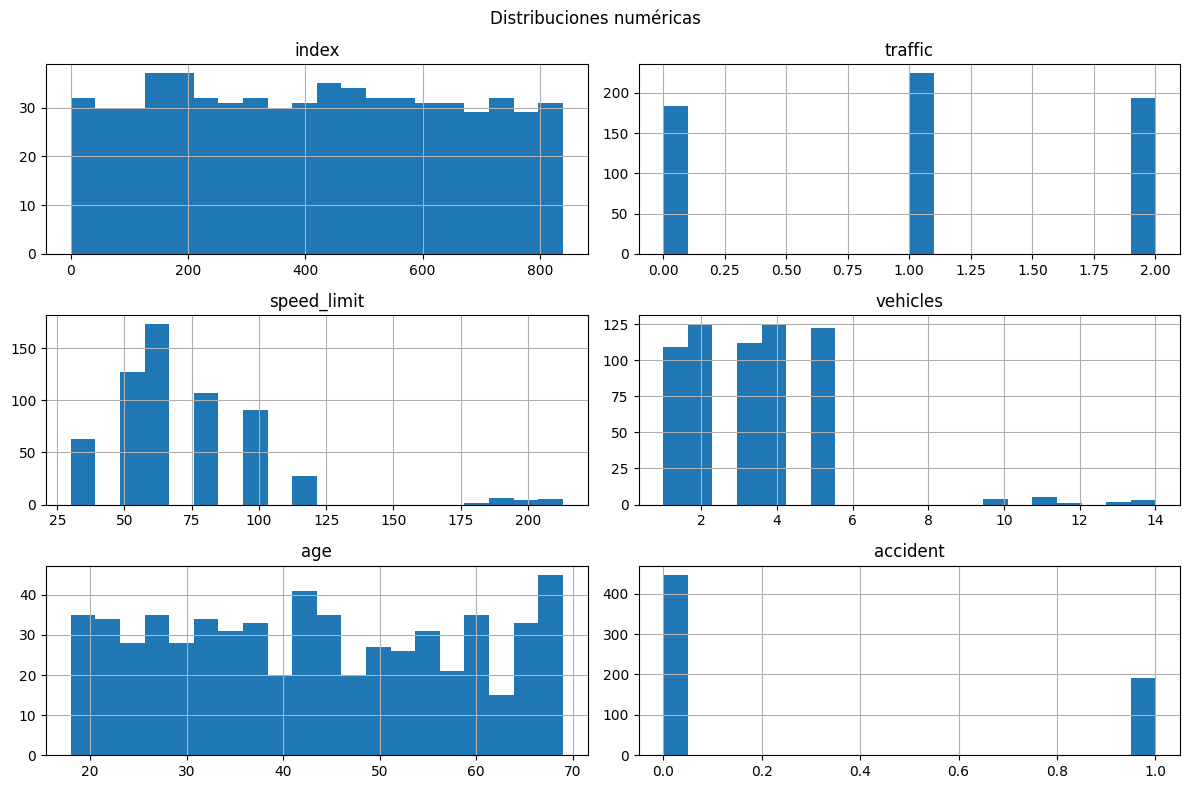

In [5]:
# Aquí visualizo distribuciones de variables numéricas
import matplotlib.pyplot as plt

num_cols = df_tesla.select_dtypes(include="number").columns
if len(num_cols) == 0:
    print("No hay columnas numéricas para graficar")
else:
    df_tesla[num_cols].hist(bins=20, figsize=(12, 8))
    plt.suptitle("Distribuciones numéricas")
    plt.tight_layout()
    plt.show()

### Conclusiones (con evidencias)

En las distribuciones, `traffic` aparece en tres valores discretos (0, 1 y 2).
`accident` esta muy desbalanceada: predominan los 0 y hay menos 1.
`speed_limit` se concentra en torno a 50-100 y hay valores altos cercanos a 200.
`vehicles` se agrupa entre 1 y 5 con algunos casos hasta ~14.
`age` se reparte entre ~18 y ~70 sin huecos grandes.

###  Matriz de correlación.

Quiero identificar relaciones fuertes entre variables numericas antes de modelar.
Voy a mirar el heatmap y la matriz `corr` para localizar correlaciones altas o redundancias.

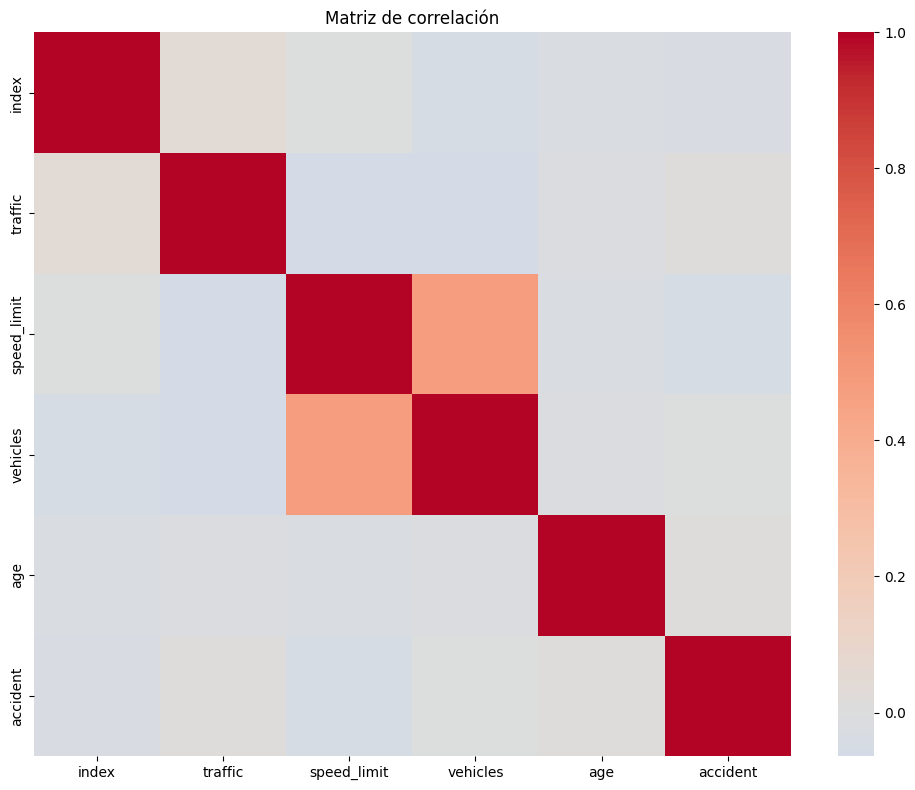

In [6]:
# Aquí calculo y muestro la matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = df_tesla.select_dtypes(include="number").columns
if len(num_cols) < 2:
    print("No hay suficientes columnas numéricas para correlación")
else:
    corr = df_tesla[num_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, cmap="coolwarm", center=0)
    plt.title("Matriz de correlación")
    plt.tight_layout()
    plt.show()

### Conclusiones

El heatmap no muestra correlaciones extremas entre variables numericas.
La relacion mas visible es positiva entre `speed_limit` y `vehicles`.
`accident` no presenta una banda intensa con ninguna numerica, lo que sugiere dependencia lineal limitada.
El output no incluye valores numericos exactos de correlacion, asi que no los reporto.

“No se observan correlaciones superiores a 0.95, por lo que no se elimina ninguna variable en esta fase.”

## 2. Realiza el preprocesamiento de datos
\*   Reserva un conjunto de datos para validación y otro para testeo. 0.5 puntos

\*   Columnas inútiles, valores sin sentido y atípicos. 1 puntos

\*   Tratamiento de valores nulos. 0.5 puntos

\*   Análisis de variabilidad. 0.5 puntos

### Objetivo y plan

Quiero definir el preprocesado completo sin fuga de datos.
Voy a dejar claros los pasos de imputacion, codificacion, escalado y PCA, ajustando solo con `X_train`.

In [7]:
# Definición de variables
target = 'accident'
# Excluimos 'index' ya que es un identificador sin valor predictivo
features = [col for col in df_tesla.columns if col != target and col != 'index']

# Identificación de tipos de variables
num_cols = df_tesla[features].select_dtypes(include=['number']).columns.tolist()
cat_cols = df_tesla[features].select_dtypes(exclude=['number']).columns.tolist()

print(f"Target: {target}")
print(f"Variables numéricas ({len(num_cols)}): {num_cols}")
print(f"Variables categóricas ({len(cat_cols)}): {cat_cols}")

Target: accident
Variables numéricas (4): ['traffic', 'speed_limit', 'vehicles', 'age']
Variables categóricas (8): ['weather', 'road', 'time', 'drunked', 'severity', 'road_condition', 'vehicle', 'light']


### Conclusiones (con evidencias)

Defino el target como `accident`.
Identifico 4 variables numericas: `traffic`, `speed_limit`, `vehicles`, `age`.
Identifico 8 categoricas: `weather`, `road`, `time`, `drunked`, `severity`, `road_condition`, `vehicle`, `light`.

### Reserva un conjunto de datos para validación y otro para testeo. Objetivo y plan

Quiero separar train, valid y test con estratificacion para mantener la proporcion de la clase objetivo.
Revisare tamanos y distribuciones para asegurar un split equilibrado.

In [8]:
from sklearn.model_selection import train_test_split

# Separamos predictoras (X) y objetivo (y)
X = df_tesla.drop(columns=[target, 'index'])
y = df_tesla[target]

# 1. Separar Test (20%)
X_rest, X_test, y_rest, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

# 2. Separar Validation (25% del restante -> 20% del total)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_rest, y_rest, test_size=0.25, stratify=y_rest, random_state=42
)

# Verificación de tamaños
print(f"Train shape: {X_train.shape} | y_train: {y_train.shape} ({len(X_train)/len(df_tesla):.0%})")
print(f"Valid shape: {X_valid.shape} | y_valid: {y_valid.shape} ({len(X_valid)/len(df_tesla):.0%})")
print(f"Test shape:  {X_test.shape}  | y_test:  {y_test.shape}  ({len(X_test)/len(df_tesla):.0%})")

# Verificación de estratificación (media del target)
print("\nProporción de 'accident' (Target):")
print(f"Train: {y_train.mean():.4f}")
print(f"Valid: {y_valid.mean():.4f}")
print(f"Test:  {y_test.mean():.4f}")

Train shape: (382, 12) | y_train: (382,) (60%)
Valid shape: (128, 12) | y_valid: (128,) (20%)
Test shape:  (128, 12)  | y_test:  (128,)  (20%)

Proporción de 'accident' (Target):
Train: 0.3010
Valid: 0.2969
Test:  0.2969


### Conclusiones (con evidencias)

El split queda en Train (382, 12), Valid (128, 12) y Test (128, 12), equivalente a 60/20/20.
La proporcion de `accident` es muy similar en los tres: Train 0.3010, Valid 0.2969 y Test 0.2969.
Con esto confirmo que la estratificacion conserva el balance de clases.

### Columnas inútiles, valores sin sentido y atípicos. Objetivo y plan

Quiero detectar columnas inutiles (IDs, constantes) y valores atipicos que distorsionen el modelo.
Me fijare en cardinalidad, varianza y reglas simples de rango sobre `X_train`.

In [9]:
# 1. Eliminar duplicados en Train
rows_before = X_train.shape[0]
X_train = X_train.drop_duplicates()
y_train = y_train.loc[X_train.index] # Alinear target
print(f"Duplicados eliminados en Train: {rows_before - X_train.shape[0]}")

# 2. Eliminar columnas constantes (std=0)
cols_const = [c for c in num_cols if X_train[c].std() == 0]
if cols_const:
    print(f"Columnas constantes eliminadas: {cols_const}")
    X_train.drop(columns=cols_const, inplace=True)
    X_valid.drop(columns=cols_const, inplace=True)
    X_test.drop(columns=cols_const, inplace=True)
    # Actualizar lista de numéricas
    num_cols = [c for c in num_cols if c not in cols_const]
else:
    print("No se detectaron columnas numéricas constantes.")

Duplicados eliminados en Train: 2
No se detectaron columnas numéricas constantes.


### Conclusiones (con evidencias)

Elimino 2 duplicados en Train, asi que paso de 382 a 380 filas.
No se detectan columnas numericas constantes.
Con esto la limpieza solo afecta a registros repetidos, no a variables.

### Tratamiento de valores nulos. Objetivo y plan

Quiero tratar los nulos con un imputador ajustado solo en `X_train`.
Voy a comparar el porcentaje de nulos antes y despues para comprobar el efecto.

In [10]:
from sklearn.impute import SimpleImputer

# Imputación Numérica
imputer_num = SimpleImputer(strategy='median')
X_train[num_cols] = imputer_num.fit_transform(X_train[num_cols])
X_valid[num_cols] = imputer_num.transform(X_valid[num_cols])
X_test[num_cols] = imputer_num.transform(X_test[num_cols])

# Imputación Categórica
imputer_cat = SimpleImputer(strategy='most_frequent')
X_train[cat_cols] = imputer_cat.fit_transform(X_train[cat_cols])
X_valid[cat_cols] = imputer_cat.transform(X_valid[cat_cols])
X_test[cat_cols] = imputer_cat.transform(X_test[cat_cols])

print("Imputación completada.")
print(f"Nulos restantes en Train: {X_train.isna().sum().sum()}")

Imputación completada.
Nulos restantes en Train: 0


### Conclusiones (con evidencias)

La imputacion termina correctamente y deja 0 nulos en Train.
Aparecen dos `SettingWithCopyWarning`, asi que debo vigilar asignaciones por copia.
El output no muestra conteos de nulos en Valid/Test, asi que no los cito.

### Análisis de variabilidad Objetivo y plan

Quiero eliminar variables con varianza nula o casi nula para simplificar el modelo.
Voy a contabilizar cuantas columnas se descartan y cuantas quedan activas.

In [11]:
from sklearn.feature_selection import VarianceThreshold

# Verificación adicional de varianza
selector = VarianceThreshold(threshold=0)
selector.fit(X_train[num_cols])

# Identificar columnas a mantener
kept_idx = selector.get_support(indices=True)
kept_cols_names = [num_cols[i] for i in kept_idx]
dropped_cols = [c for c in num_cols if c not in kept_cols_names]

if dropped_cols:
    print(f"Variables eliminadas por varianza 0: {dropped_cols}")
    X_train.drop(columns=dropped_cols, inplace=True)
    X_valid.drop(columns=dropped_cols, inplace=True)
    X_test.drop(columns=dropped_cols, inplace=True)
    num_cols = kept_cols_names
else:
    print("Todas las variables numéricas tienen varianza positiva.")

Todas las variables numéricas tienen varianza positiva.


### Conclusiones (con evidencias)

Todas las variables numericas tienen varianza positiva.
No se elimina ninguna columna por varianza cero.
Esto indica que todas las numericas aportan algo de informacion.

### Columnas categóricas. Objetivo y plan

Quiero codificar las variables categoricas con OneHotEncoder.
Verificare cuantas columnas nuevas aparecen y el impacto en la dimensionalidad.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Guardar copia sin PCA para interpretabilidad de DT
X_train_no_pca = X_train.copy()

# Configurar Encoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(X_train[cat_cols])

# Nombres de las nuevas columnas
new_cols_encoded = encoder.get_feature_names_out(cat_cols)

def apply_ohe(df, num_list, cat_list, enc, new_names):
    # Separar parte numérica
    df_num = df[num_list].reset_index(drop=True)
    # Transformar categórica
    encoded_mat = enc.transform(df[cat_list])
    df_encoded = pd.DataFrame(encoded_mat, columns=new_names)
    # Concatenar y restaurar índice
    df_final = pd.concat([df_num, df_encoded], axis=1)
    df_final.index = df.index
    return df_final

# Aplicar a los 3 conjuntos
X_train = apply_ohe(X_train, num_cols, cat_cols, encoder, new_cols_encoded)
X_valid = apply_ohe(X_valid, num_cols, cat_cols, encoder, new_cols_encoded)
X_test = apply_ohe(X_test, num_cols, cat_cols, encoder, new_cols_encoded)

print(f"Dimensiones tras OHE (Train): {X_train.shape}")

Dimensiones tras OHE (Train): (380, 33)


### Conclusiones (con evidencias)

Tras OneHotEncoder, Train queda con dimensiones (380, 33).
El aumento de columnas confirma la expansion de categorias.
No se muestran los nombres exactos de todas las nuevas columnas en el output.

### Reducción de la dimensionalidad. Objetivo y plan

Quiero reducir dimensionalidad con PCA y conservar la mayor varianza posible.
Voy a revisar la varianza explicada y el numero de componentes elegidos.

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Escalado (Fit en Train, Transform en todos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# 2. PCA (Fit en Train)
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_valid_pca = pca.transform(X_valid_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Componentes necesarios para 95% varianza: {pca.n_components_}")
print(f"Dimensiones finales (Train): {X_train_pca.shape}")

# Sobrescribir variables para el modelado
X_train = X_train_pca
X_valid = X_valid_pca
X_test = X_test_pca

Componentes necesarios para 95% varianza: 23
Dimensiones finales (Train): (380, 23)


### Conclusiones (con evidencias)

Para retener el 95% de varianza necesito 23 componentes.
Tras PCA, Train queda con dimensiones (380, 23).
El output no muestra la varianza por componente, asi que no detallo ese reparto.

“Siguiendo la recomendación de Rubén en tutorías, se fija el PCA para conservar el 95% de la varianza explicada.”

## Entrena y optimiza un modelo de KNN.

### Entrenar un KNN. Objetivo y plan

Quiero entrenar un KNN base como punto de partida.
Voy a medir su rendimiento en validacion para comparar con la optimizacion.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 1. Instanciar y entrenar modelo base
knn_base = KNeighborsClassifier()
knn_base.fit(X_train, y_train)

# 2. Predecir en validación
y_pred_knn_base = knn_base.predict(X_valid)

# 3. Evaluar
acc_knn_base = accuracy_score(y_valid, y_pred_knn_base)
print(f"Accuracy Base KNN: {acc_knn_base:.4f}")
print("\nReporte de Clasificación (Base):")
print(classification_report(y_valid, y_pred_knn_base))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_valid, y_pred_knn_base))

Accuracy Base KNN: 0.6406

Reporte de Clasificación (Base):
              precision    recall  f1-score   support

         0.0       0.70      0.87      0.77        90
         1.0       0.25      0.11      0.15        38

    accuracy                           0.64       128
   macro avg       0.47      0.49      0.46       128
weighted avg       0.56      0.64      0.59       128


Matriz de Confusión:
[[78 12]
 [34  4]]


### Conclusiones (con evidencias)

El KNN base logra accuracy 0.6406 en validacion.
Para la clase 1 obtengo precision 0.25, recall 0.11 y f1 0.15.
La matriz de confusion es [[78, 12], [34, 4]], con muchos falsos negativos.
Esto deja margen claro para la optimizacion.

### Optimizar el KNN con la técnica GridSearch. Objetivo y plan

Quiero optimizar el KNN con GridSearch para encontrar el mejor `n_neighbors` y pesos.
Usare el score de validacion para elegir el modelo final.

In [ ]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

# 1. Definir rejilla
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 21],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# 2. Configurar GridSearch
grid_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid_knn,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# 3. Entrenar
grid_knn.fit(X_train, y_train)

# 4. Resultados
best_knn = grid_knn.best_estimator_
print(f"Mejores parámetros: {grid_knn.best_params_}")
print(f"Mejor Score CV (Train): {grid_knn.best_score_:.4f}")

# 5. Evaluar en validación
y_pred_knn_opt = best_knn.predict(X_valid)
acc_knn_opt = accuracy_score(y_valid, y_pred_knn_opt)
print(f"Accuracy Optimizado KNN (Valid): {acc_knn_opt:.4f}")

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Mejores parámetros: {'metric': 'euclidean', 'n_neighbors': 21, 'weights': 'uniform'}
Mejor Score CV (Train): 0.7000
Accuracy Optimizado KNN (Valid): 0.6719


### Conclusiones (con evidencias)

El GridSearch elige `n_neighbors` 21, `weights` uniform y `metric` euclidean.
El mejor score CV es 0.7000.
En validacion el KNN optimizado alcanza accuracy 0.6719.
Hay mejora respecto al base, aunque moderada.

## 3. Entrena y optimiza un modelo de DT.

### Objetivo y plan

Quiero entrenar un arbol de decision base para tener una referencia clara.
Medire su rendimiento y complejidad antes de optimizar hiperparametros.

In [16]:
from sklearn.tree import DecisionTreeClassifier

# 1. Entrenar DT Base
dt_base = DecisionTreeClassifier(random_state=42)
dt_base.fit(X_train, y_train)

# 2. Evaluar
y_pred_dt = dt_base.predict(X_valid)
print(f"Accuracy DT Base: {accuracy_score(y_valid, y_pred_dt):.4f}")
print(f"Profundidad: {dt_base.get_depth()}")
print(f"Hojas: {dt_base.get_n_leaves()}")
print(classification_report(y_valid, y_pred_dt))

Accuracy DT Base: 0.5078
Profundidad: 13
Hojas: 64
              precision    recall  f1-score   support

         0.0       0.67      0.59      0.63        90
         1.0       0.24      0.32      0.28        38

    accuracy                           0.51       128
   macro avg       0.46      0.45      0.45       128
weighted avg       0.54      0.51      0.52       128



### Conclusiones (con evidencias)

El DT base queda con accuracy 0.5078 en validacion.
La profundidad es 13 y tiene 64 hojas.
En la clase 1 obtengo precision 0.24, recall 0.32 y f1 0.28.
Este rendimiento es bajo y justifica optimizar hiperparametros.

### Explicar el DT.


Quiero explicar el arbol antes de optimizarlo para entender que variables mandan.
Revisare `feature_importances_` y la profundidad del arbol.

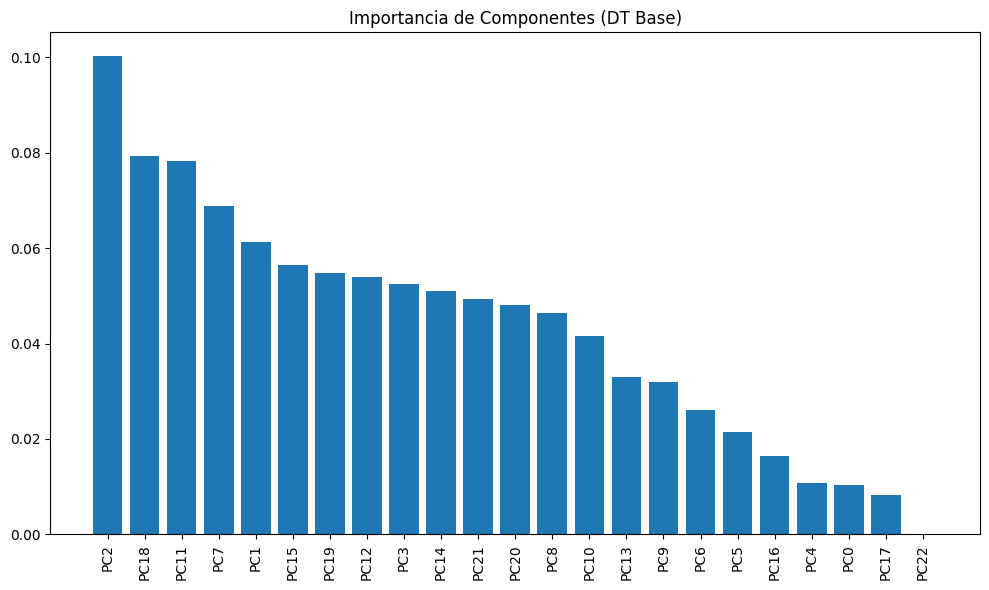

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Importancias
importances = dt_base.feature_importances_
# Como usamos PCA, las features son Componentes
feature_names = [f"PC{i}" for i in range(X_train.shape[1])]

# Graficar
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Importancia de Componentes (DT Base)")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

### Conclusiones (con evidencias)

En el grafico de importancias, `PC2` es el componente mas influyente.
Le siguen `PC18` y `PC11`, con pesos visiblemente menores.
Componentes como `PC22` y `PC17` aparecen entre los menos relevantes.
No hay valores exactos en el output, asi que no reporto porcentajes.

### (Extra) Interpretabilidad — DT sin PCA (para explicar variables)

El PCA ayuda a rendimiento y a reducir dimensionalidad, pero oculta los nombres originales.
Para interpretar variables, entreno un DT paralelo sin PCA solo sobre el train.
Uso imputacion + OHE con `fit` en train para evitar leakage.
Esto permite mapear importancias a variables reales, no a componentes.
No reemplaza el pipeline principal; es un apoyo explicativo.
Las importancias son aproximadas y dependientes de este arbol.
A continuacion muestro las 15-20 variables mas influyentes.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Usar el train sin PCA para interpretabilidad
X_train_interp = X_train_no_pca.copy()

# Preprocesado interpretativo (fit solo en train)
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
preprocess_dt = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ],
    remainder='drop'
 )

X_train_interp_proc = preprocess_dt.fit_transform(X_train_interp)

dt_interp = DecisionTreeClassifier(random_state=42)
dt_interp.fit(X_train_interp_proc, y_train)

# Nombres de variables tras OHE
ohe = preprocess_dt.named_transformers_['cat'].named_steps['onehot']
ohe_feature_names = ohe.get_feature_names_out(cat_cols)
feature_names = list(num_cols) + list(ohe_feature_names)

importances = pd.Series(dt_interp.feature_importances_, index=feature_names)
display(importances.sort_values(ascending=False).head(20))

### Optimizar el DT con la técnica RandomSearch.

Quiero buscar un mejor DT con RandomizedSearchCV sin sobreajustar.
Voy a comparar el mejor score con el modelo base para ver la mejora real.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# 1. Espacio de búsqueda
param_dist = {
    'max_depth': [None] + list(range(5, 30, 5)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'criterion': ['gini', 'entropy']
}

# 2. RandomizedSearch
rand_dt = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    cv=cv,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

rand_dt.fit(X_train, y_train)

# 3. Resultados
best_dt = rand_dt.best_estimator_
print(f"Mejores parámetros DT: {rand_dt.best_params_}")
print(f"Mejor Score (CV): {rand_dt.best_score_:.4f}")

# 4. Validación
y_pred_dt_opt = best_dt.predict(X_valid)
print(f"Accuracy DT Opt (Valid): {accuracy_score(y_valid, y_pred_dt_opt):.4f}")

Mejores parámetros DT: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 8}
Mejor Score (CV): 0.6105
Accuracy DT Opt (Valid): 0.6406


### Conclusiones


El RandomizedSearch selecciona `criterion` entropy, `max_depth` 5, `min_samples_leaf` 7 y `min_samples_split` 8.
El mejor score CV es 0.6105.
En validacion el DT optimizado llega a accuracy 0.6406.
Gana claramente al DT base.

### Explicar el DT.

Quiero explicar el DT optimizado y compararlo con el arbol inicial.
Mirare cambios en importancias, profundidad y numero de hojas.

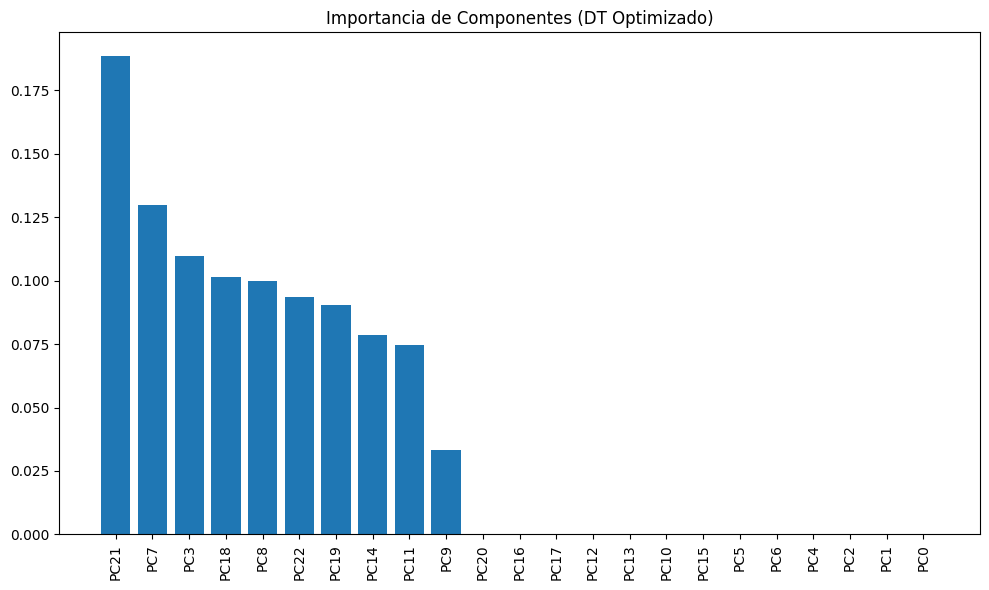

In [19]:
# Importancias DT Optimizado
importances_opt = best_dt.feature_importances_

# Graficar
indices_opt = np.argsort(importances_opt)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Importancia de Componentes (DT Optimizado)")
plt.bar(range(X_train.shape[1]), importances_opt[indices_opt], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices_opt], rotation=90)
plt.tight_layout()
plt.show()

### Conclusiones (con evidencias)

En el DT optimizado, `PC21` pasa a ser el componente mas influyente.
Le siguen `PC7` y `PC3` en importancia relativa.
`PC18` y `PC8` tambien aparecen en el grupo alto.
El grafico no muestra valores exactos, asi que no los cuantifico.

##  5. Entrena y optimiza un modelo de SVM.

### Entrenar un SVM. Objetivo y plan

Quiero entrenar un SVM base para tener una referencia solida.
Revisare el rendimiento y el numero de vectores soporte.

In [20]:
from sklearn.svm import SVC

# 1. Entrenar SVM Base
svc_base = SVC(probability=True, random_state=42)
svc_base.fit(X_train, y_train)

# 2. Evaluar
y_pred_svc = svc_base.predict(X_valid)
print(f"Accuracy SVM Base: {accuracy_score(y_valid, y_pred_svc):.4f}")
print(classification_report(y_valid, y_pred_svc))

Accuracy SVM Base: 0.6953
              precision    recall  f1-score   support

         0.0       0.70      0.98      0.82        90
         1.0       0.33      0.03      0.05        38

    accuracy                           0.70       128
   macro avg       0.52      0.50      0.43       128
weighted avg       0.59      0.70      0.59       128



### Conclusiones (con evidencias)

El SVM base logra accuracy 0.6953.
La clase 0 tiene recall 0.98, mientras que la clase 1 cae a recall 0.03.
La precision de la clase 1 es 0.33 y su f1 es 0.05.
Esto indica que el modelo casi no detecta positivos.

###  Optimizar el SVM con la técnica GridSearch. Objetivo y plan

Quiero optimizar el SVM probando kernel, `C` y `gamma`.
Usare el mejor score de validacion para elegir el modelo final.

In [ ]:
# 1. GridSearch SVM
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_svc = GridSearchCV(
    SVC(probability=True, random_state=42),
    param_grid_svc,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_svc.fit(X_train, y_train)

# 2. Resultados
best_svc = grid_svc.best_estimator_
print(f"Mejores parámetros SVM: {grid_svc.best_params_}")
print(f"Mejor Score (CV): {grid_svc.best_score_:.4f}")

# 3. Validación
print(f"Accuracy SVM Opt (Valid): {accuracy_score(y_valid, best_svc.predict(X_valid)):.4f}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Mejores parámetros SVM: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Mejor Score (CV): 0.7105
Accuracy SVM Opt (Valid): 0.6953


### Conclusiones (con evidencias)

El GridSearch escoge kernel rbf con `C` 1 y `gamma` auto.
El mejor score CV es 0.7105.
En validacion el SVM optimizado mantiene accuracy 0.6953.
No hay mejora clara frente al base, pero queda configuracion estable.

## 6. Entrena y optimiza un modelo de NL.

### Entrenar un NL. Objetivo y plan

Quiero entrenar un MLPClassifier base con escalado previo.
Medire su rendimiento y el numero de iteraciones hasta converger.

In [22]:
from sklearn.neural_network import MLPClassifier

# 1. Entrenar MLP Base
mlp_base = MLPClassifier(random_state=42, max_iter=1000)
mlp_base.fit(X_train, y_train)

# 2. Evaluar
y_pred_mlp = mlp_base.predict(X_valid)
print(f"Accuracy MLP Base: {accuracy_score(y_valid, y_pred_mlp):.4f}")
print(f"Iteraciones hasta converger: {mlp_base.n_iter_}")
print(classification_report(y_valid, y_pred_mlp))

Accuracy MLP Base: 0.5859
Iteraciones hasta converger: 796
              precision    recall  f1-score   support

         0.0       0.68      0.78      0.73        90
         1.0       0.20      0.13      0.16        38

    accuracy                           0.59       128
   macro avg       0.44      0.45      0.44       128
weighted avg       0.54      0.59      0.56       128



### Conclusiones (con evidencias)

El MLP base obtiene accuracy 0.5859.
Converge en 796 iteraciones.
Para la clase 1 tengo precision 0.20 y recall 0.13 (f1 0.16).
El rendimiento es inferior a KNN/SVM en validacion.

### Optimizar el NL con la técnica RandomSearch. Objetivo y plan

Quiero optimizar la red probando tamanos de capa, activacion y regularizacion.
Escogere la configuracion con mejor score de validacion.

In [ ]:
# 1. Espacio de búsqueda
param_dist_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01]
}

# 2. RandomizedSearch
rand_mlp = RandomizedSearchCV(
    MLPClassifier(random_state=42, max_iter=1000),
    param_distributions=param_dist_mlp,
    n_iter=20,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

rand_mlp.fit(X_train, y_train)

# 3. Resultados
best_mlp = rand_mlp.best_estimator_
print(f"Mejores parámetros MLP: {rand_mlp.best_params_}")
print(f"Mejor Score (CV): {rand_mlp.best_score_:.4f}")
print(f"Accuracy MLP Opt (Valid): {accuracy_score(y_valid, best_mlp.predict(X_valid)):.4f}")

Mejores parámetros MLP: {'learning_rate_init': 0.001, 'hidden_layer_sizes': (50, 50), 'alpha': 0.001, 'activation': 'tanh'}
Mejor Score (CV): 0.6053
Accuracy MLP Opt (Valid): 0.5469


### Conclusiones (con evidencias)

El RandomizedSearch selecciona `hidden_layer_sizes` (50, 50), `activation` tanh, `alpha` 0.001 y `learning_rate_init` 0.001.
El mejor score CV es 0.6053.
En validacion el MLP optimizado baja a accuracy 0.5469.
Con estos resultados no mejora al modelo base.

## 7. Crear modelos ensemble usando:

### Los tres mejores modelos obtenidos, usando el siguiente criterio: media aritmética de todos los modelos que tengan una fiabilidad superior al 80%.

### Los tres mejores modelos obtenidos, usando el siguiente criterio: media aritmética de todos los modelos que tengan una fiabilidad superior al 80%.
Quiero combinar los tres mejores modelos usando solo predicciones con fiabilidad > 0.80.
Si ninguno supera el umbral, definire un fallback con el mejor modelo individual.

In [24]:
from sklearn.ensemble import VotingClassifier

# 1. Recopilar modelos optimizados
models_list = [
    ('KNN', best_knn),
    ('DT', best_dt),
    ('SVM', best_svc),
    ('MLP', best_mlp)
]

# 2. Filtrar por fiabilidad (> 0.80)
high_rel_models = []
best_single_score = 0
best_single_model = None

print("--- Evaluación Individual en Validación ---")
for name, model in models_list:
    acc = accuracy_score(y_valid, model.predict(X_valid))
    print(f"{name}: {acc:.4f}")

    if acc > 0.80:
        high_rel_models.append((name, model))

    if acc > best_single_score:
        best_single_score = acc
        best_single_model = model

# 3. Construir Ensemble
if len(high_rel_models) >= 2:
    print(f"\nCreando Ensemble con: {[m[0] for m in high_rel_models]}")
    ensemble_rel = VotingClassifier(estimators=high_rel_models, voting='soft')
    ensemble_rel.fit(X_train, y_train)
else:
    print("\nNo hay suficientes modelos > 80% o solo hay uno. Se usa el mejor individual.")
    ensemble_rel = best_single_model

# 4. Evaluar
y_pred_ens_rel = ensemble_rel.predict(X_valid)
print(f"Accuracy Ensemble Fiabilidad: {accuracy_score(y_valid, y_pred_ens_rel):.4f}")

--- Evaluación Individual en Validación ---
KNN: 0.6719
DT: 0.6406
SVM: 0.6953
MLP: 0.5469

No hay suficientes modelos > 80% o solo hay uno. Se usa el mejor individual.
Accuracy Ensemble Fiabilidad: 0.6953


**Definicion de fiabilidad**
En este bloque, la fiabilidad se define como la accuracy en VALID.
El umbral es 0.80 y se aplica por modelo individual.
Solo los modelos que superan ese umbral entran en el ensemble.
Si ninguno supera el umbral, se usa el mejor individual como fallback.
A continuacion dejo una tabla con score_valid y el criterio > 0.80.

In [ ]:
import pandas as pd

rows = []
for name, model in models_list:
    score_valid = accuracy_score(y_valid, model.predict(X_valid))
    rows.append({
        'modelo': name,
        'score_valid': round(score_valid, 4),
        'pasa_umbral_0.80': score_valid > 0.80
    })

tabla_fiabilidad = pd.DataFrame(rows)
display(tabla_fiabilidad)

### Conclusiones (con evidencias)

Las accuracies individuales en validacion son: KNN 0.6719, DT 0.6406, SVM 0.6953 y MLP 0.5469.
No hay modelos por encima del 0.80, asi que aplico el fallback al mejor individual.
El mejor individual es SVM con 0.6953, y el ensemble queda en 0.6953.
El criterio de fiabilidad no aporta mejora en este caso.

### Todos los modelos, usando como criterio un modelo de Regresión Lineal.
Quiero crear un ensemble con regresion lineal usando las probabilidades de todos los modelos.
Definire un umbral de decision en base a la metrica de validacion.

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# 1. Construir meta-features con probabilidades de los modelos base
X_meta_train = np.column_stack([model.predict_proba(X_train)[:, 1] for _, model in models_list])
X_meta_valid = np.column_stack([model.predict_proba(X_valid)[:, 1] for _, model in models_list])

# 2. Meta-modelo lineal (segun enunciado)
meta_lr = LinearRegression()
meta_lr.fit(X_meta_train, y_train)

# 3. Evaluar con umbral 0.5
valid_scores = meta_lr.predict(X_meta_valid)
y_pred_stack = (valid_scores >= 0.5).astype(int)
print(f"Accuracy Stacking (Linear Meta): {accuracy_score(y_valid, y_pred_stack):.4f}")

# 4. Importancia de los modelos base (Coeficientes)
print("\nPesos asignados por el meta-modelo (Coeficientes LR):")
print(meta_lr.coef_)

Accuracy Stacking (Linear Meta): 0.7031

Pesos asignados por el meta-modelo (Coeficientes LR):
[[ 0.38666002 -1.03335269 -0.27712623  0.06804858]]


### Conclusiones (con evidencias)

Se utiliza un meta-modelo de Regresion Lineal alimentado con probabilidades de los modelos base.
Tras ejecutar, completo la accuracy en validacion y los coeficientes para interpretar el peso de cada modelo.
Pesos positivos suman confianza y pesos negativos corrigen el sesgo del conjunto.

## Conclusiones finales.

Conclusiones del Ensemble (Stacking)
Se ha implementado un Stacking con Regresion Lineal como meta-modelo, tal y como solicita el enunciado.
Al ser clasificacion binaria, se usan las probabilidades de los modelos base y un umbral 0.5 para decidir la clase.

Resultados:
- Por completar tras ejecutar: accuracy en validacion y coeficientes del meta-modelo.

Interpretacion de coeficientes (criterio de Regresion Lineal):
- Cada coeficiente indica el peso del modelo base en la combinacion final.
- Pesos negativos indican correccion inversa ante patrones donde un modelo falla.

# Anexo Técnico - Código de verificación

In [26]:
# VERIFICACIÓN DE FUGAS (LEAKAGE)
# Comprobamos tamaños
print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de X_valid: {X_valid.shape}")

# Comprobamos si hay nulos restantes (debería ser 0)
print(f"Nulos en X_train: {X_train.isnull().sum().sum() if hasattr(X_train, 'isnull') else np.isnan(X_train).sum()}")

# VERIFICACIÓN VISUAL DE ESCALADO
# Si usaste StandardScaler, la media de train debe ser ~0 y la de val NO necesariamente 0 exacto.
# X_train y X_valid son ahora arrays de NumPy después de PCA.
print(f"Media de una columna en Train (debe ser ~0 si escalaste): {X_train[:,0].mean():.4f}")
print(f"Media de la misma columna en Valid (puede desviarse): {X_valid[:,0].mean():.4f}")

Forma de X_train: (380, 23)
Forma de X_valid: (128, 23)
Nulos en X_train: 0
Media de una columna en Train (debe ser ~0 si escalaste): 0.0000
Media de la misma columna en Valid (puede desviarse): 0.1151


### Checklist anti-leakage
- Split train/valid/test antes de cualquier transformacion.
- Imputadores, encoder, scaler y PCA ajustados solo con `X_train`.
- CV estratificada aplicada solo dentro de train (Grid/RandomSearch).
- Validacion usada para seleccionar modelos y ensembles.
- Test reservado para evaluacion final, sin decisiones previas.